In [1]:
#imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("CC GENERAL.csv")

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.shape

(8950, 18)

In [6]:
def data_profile(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
    stats_df.sort_values('Percentage of missing values', ascending=True)
    return stats_df

In [7]:
data_profile(df)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,CUST_ID,8950,0.000000,0.011173,object
1,BALANCE,8871,0.000000,0.893855,float64
2,BALANCE_FREQUENCY,43,0.000000,69.396648,float64
3,PURCHASES,6203,0.000000,22.837989,float64
4,ONEOFF_PURCHASES,4014,0.000000,48.067039,float64
5,INSTALLMENTS_PURCHASES,4452,0.000000,43.754190,float64
6,CASH_ADVANCE,4323,0.000000,51.709497,float64
7,PURCHASES_FREQUENCY,47,0.000000,24.335196,float64
8,ONEOFF_PURCHASES_FREQUENCY,47,0.000000,48.067039,float64
9,PURCHASES_INSTALLMENTS_FREQUENCY,47,0.000000,43.743017,float64


id primary key
missing value in min_payments, credit limit 

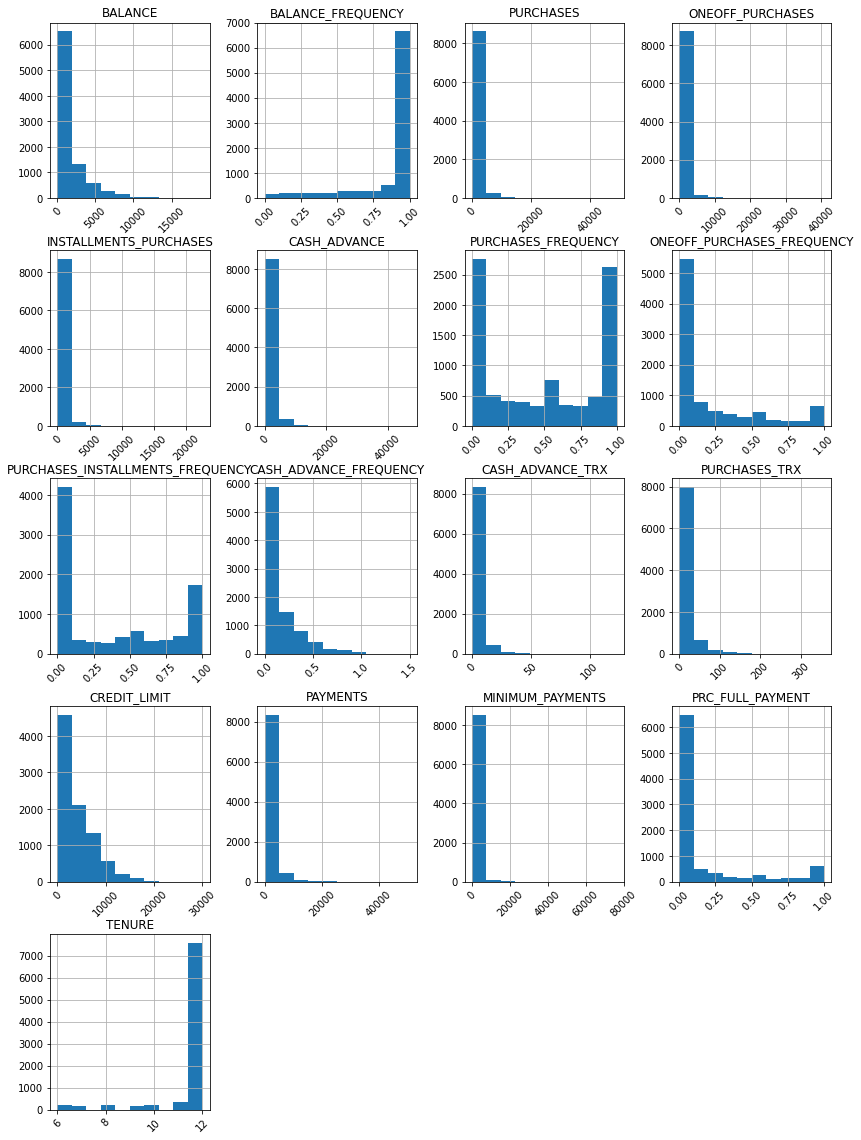

In [8]:
df.hist(figsize=(14,20), xrot=45)
plt.show()

In [9]:
#Handling nan

df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

All feature are skewed, next need to check skewness percentage

In [10]:
from scipy import stats
from scipy.stats import norm, skew
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MINIMUM_PAYMENTS,13.850125
ONEOFF_PURCHASES,10.043399
PURCHASES,8.142904
INSTALLMENTS_PURCHASES,7.297897
PAYMENTS,5.906630
CASH_ADVANCE_TRX,5.720339
CASH_ADVANCE,5.165743
PURCHASES_TRX,4.629879
BALANCE,2.392985
PRC_FULL_PAYMENT,1.942494


all are greater than 1 means highly skewed, we need to apply transformation

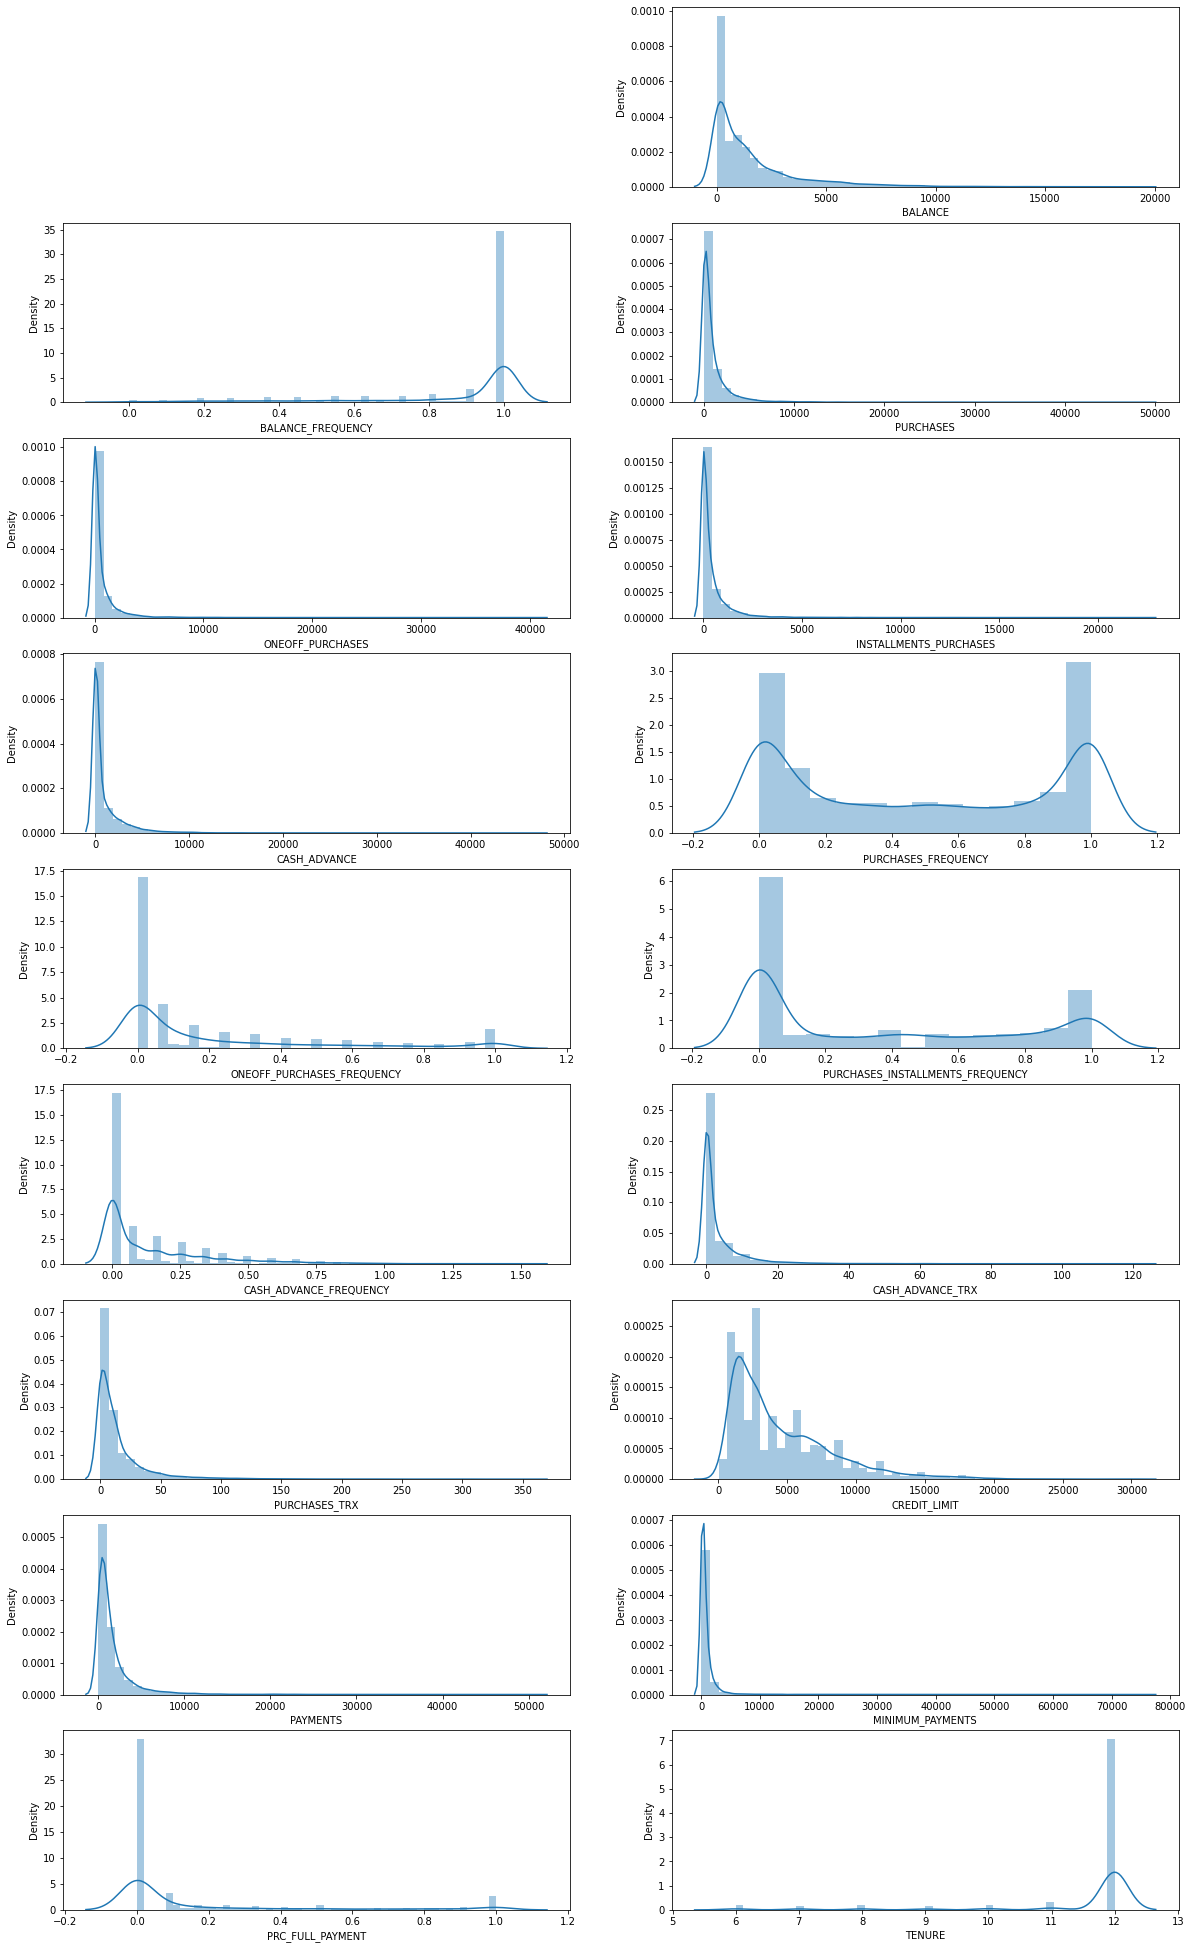

In [11]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.distplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

# since our data is skewed we need to apply transformations

In [12]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [13]:
df_copy = df.copy()

In [14]:
for i in ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']:
    df_copy[i] = (df_copy[i]+1).transform(np.log)

In [15]:
for i in ['BALANCE_FREQUENCY','TENURE']:
    df_copy[i] = pow(df_copy[i],3)

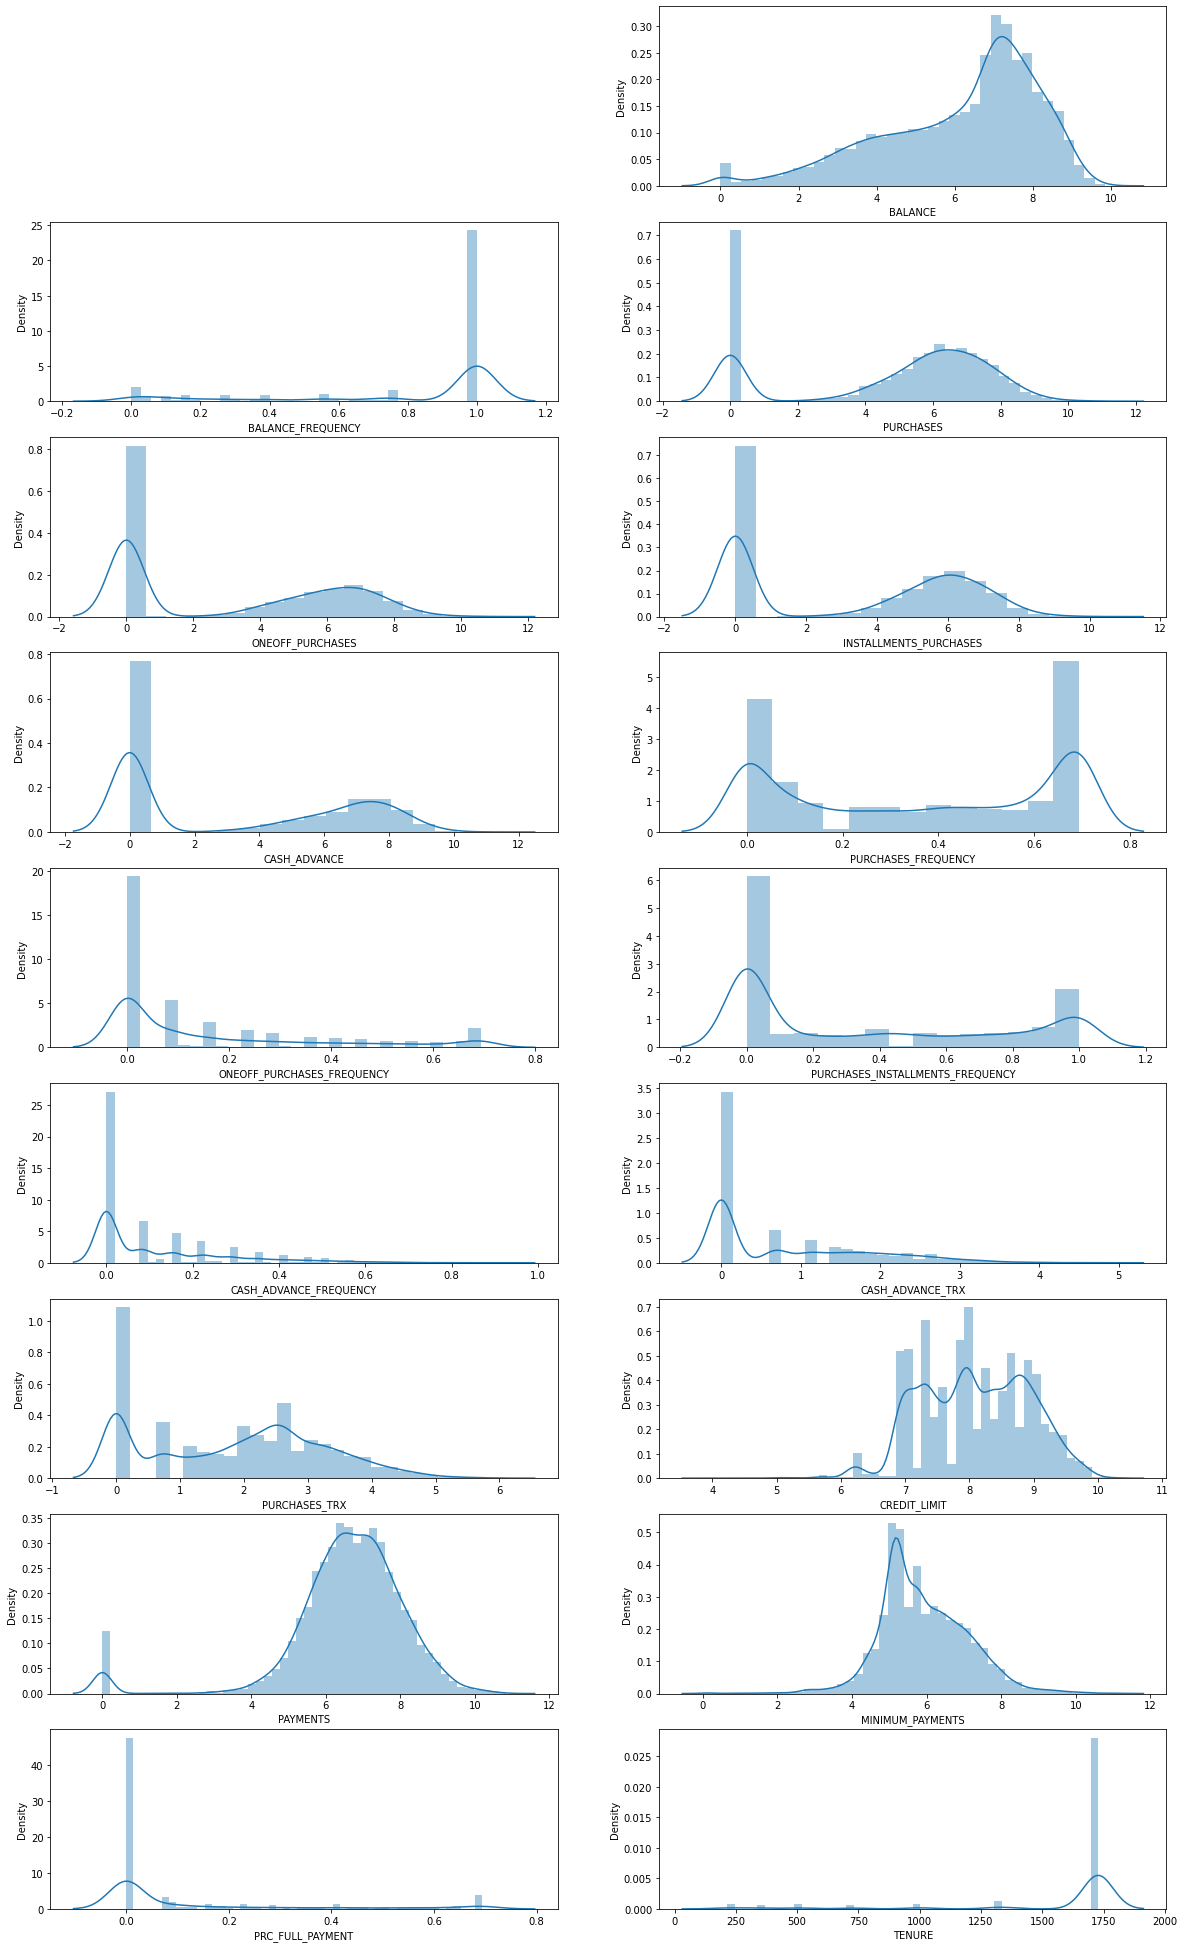

In [16]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_copy.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.distplot(df_copy[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

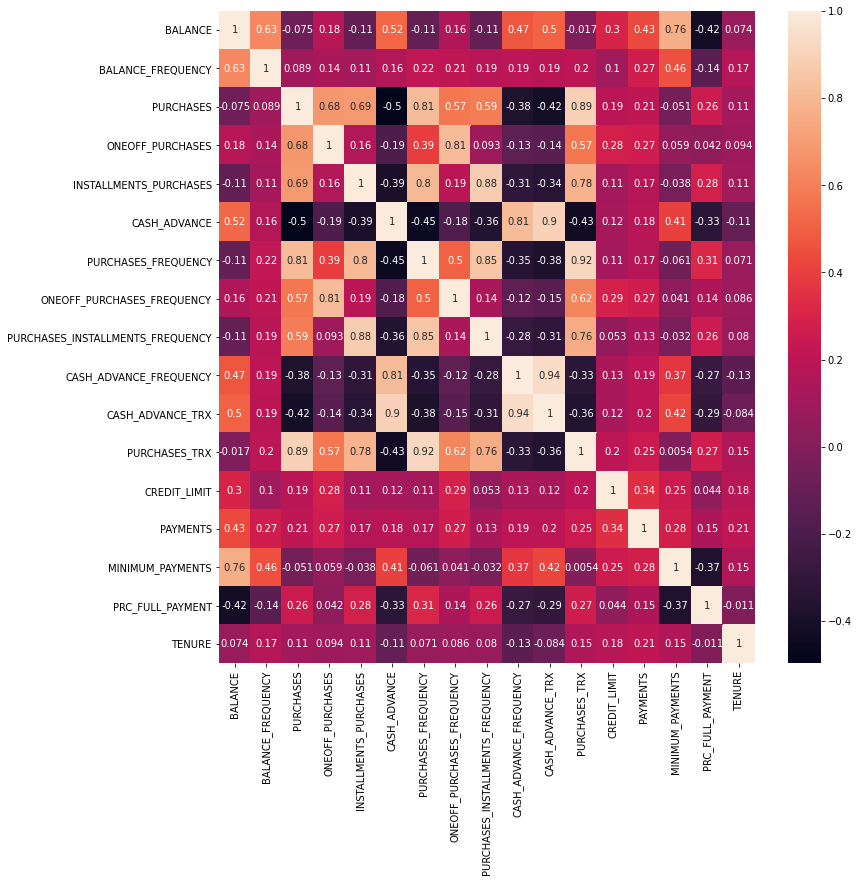

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

In [18]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
corr_mat = df_copy[numerical_features].corr()
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(kind="quicksort").drop_duplicates()
corr_mat[corr_mat>0.5]

ONEOFF_PURCHASES_FREQUENCY        PURCHASES_FREQUENCY                 0.503478
CASH_ADVANCE_TRX                  BALANCE                             0.504146
CASH_ADVANCE                      BALANCE                             0.521648
PURCHASES_TRX                     ONEOFF_PURCHASES                    0.574393
ONEOFF_PURCHASES_FREQUENCY        PURCHASES                           0.574839
PURCHASES                         PURCHASES_INSTALLMENTS_FREQUENCY    0.592411
ONEOFF_PURCHASES_FREQUENCY        PURCHASES_TRX                       0.621698
BALANCE                           BALANCE_FREQUENCY                   0.630880
PURCHASES                         ONEOFF_PURCHASES                    0.683510
                                  INSTALLMENTS_PURCHASES              0.685390
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX                       0.759533
BALANCE                           MINIMUM_PAYMENTS                    0.762724
PURCHASES_TRX                     INSTALLMENTS_PURCH

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF
vif = pd.DataFrame()
df_new= df_copy.dropna()
vif["variables"] = [feature for feature in numerical_features if feature not in ['MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'PURCHASES_TRX',
                                                                                'BALANCE', 'PURCHASES_FREQUENCY', 'PAYMENTS',
                                                                                'PURCHASES', 'CASH_ADVANCE_TRX', 'BALANCE_FREQUENCY',
                                                                                'INSTALLMENTS_PURCHASES']]

print(vif["variables"])
vif["VIF"] = [variance_inflation_factor(df_new[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

0                    ONEOFF_PURCHASES
1                        CASH_ADVANCE
2          ONEOFF_PURCHASES_FREQUENCY
3    PURCHASES_INSTALLMENTS_FREQUENCY
4              CASH_ADVANCE_FREQUENCY
5                    PRC_FULL_PAYMENT
6                              TENURE
Name: variables, dtype: object
                          variables       VIF
0                  ONEOFF_PURCHASES  5.873049
1                      CASH_ADVANCE  5.826084
2        ONEOFF_PURCHASES_FREQUENCY  4.713298
3  PURCHASES_INSTALLMENTS_FREQUENCY  2.097226
4            CASH_ADVANCE_FREQUENCY  4.566045
5                  PRC_FULL_PAYMENT  1.483762
6                            TENURE  4.555054


In [20]:
data_profile(df_copy)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,CUST_ID,8950,0.0,0.011173,object
1,BALANCE,8871,0.0,0.893855,float64
2,BALANCE_FREQUENCY,43,0.0,69.396648,float64
3,PURCHASES,6203,0.0,22.837989,float64
4,ONEOFF_PURCHASES,4014,0.0,48.067039,float64
5,INSTALLMENTS_PURCHASES,4452,0.0,43.754190,float64
6,CASH_ADVANCE,4323,0.0,51.709497,float64
7,PURCHASES_FREQUENCY,47,0.0,24.335196,float64
8,ONEOFF_PURCHASES_FREQUENCY,47,0.0,48.067039,float64
9,PURCHASES_INSTALLMENTS_FREQUENCY,47,0.0,43.743017,float64


seems like multicollinearity in purchases transaction

In [21]:
# Percentage of outliers present in each variable
outlier_percentage = {}
for feature in numerical_features:
    tempData = df_copy.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'BALANCE': 1.47,
 'BALANCE_FREQUENCY': 13.62,
 'PURCHASES': 0.0,
 'ONEOFF_PURCHASES': 0.0,
 'INSTALLMENTS_PURCHASES': 0.0,
 'CASH_ADVANCE': 0.0,
 'PURCHASES_FREQUENCY': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 5.37,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'CASH_ADVANCE_FREQUENCY': 3.77,
 'CASH_ADVANCE_TRX': 0.17,
 'PURCHASES_TRX': 0.0,
 'CREDIT_LIMIT': 0.07,
 'PAYMENTS': 3.55,
 'MINIMUM_PAYMENTS': 1.89,
 'PRC_FULL_PAYMENT': 15.97,
 'TENURE': 15.26}

# Modeling

In [22]:
df_copy = df_copy.drop('CUST_ID', axis =1 )

In [23]:
# Instantiate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_copy)
 

In [24]:
df_scaled = pd.DataFrame(df_scaled,columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'] )

In [25]:
df_new = pd.concat([df['CUST_ID'], df_scaled], axis = 1)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

# finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
pca.explained_variance_ratio_

array([0.34348488, 0.22048799])

In [27]:
principalDf

,PC 1,PC 2
0,-0.272789,-2.835882
1,-3.477503,0.914867
2,1.497642,1.328565
3,-1.267150,-1.284123
4,-1.130023,-1.301061
...,...,...
8945,1.749326,-2.808564
8946,1.272639,-2.093081
8947,1.047372,-3.379700
8948,-2.757027,-4.016442


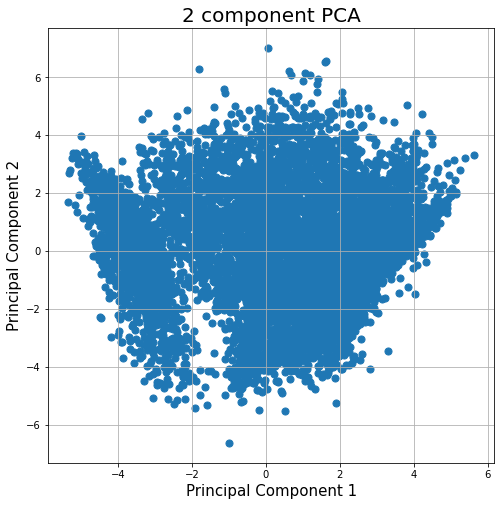

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['PC 1'], principalDf['PC 2']
               , cmap='RdYlGn'
               , s = 50)

ax.grid()

# sns.scatterplot(x = principalDf['PC 1'], y= principalDf['PC 2'], palette=sns.color_palette('hls', model.cluster_centers_.shape[0]), s=50)
# plt.title('Cluster of Customers', size=15, pad=10)
# plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

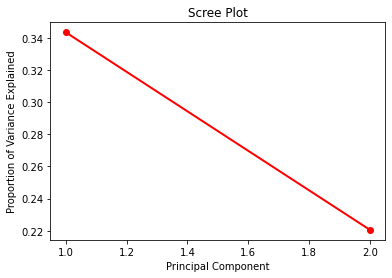

In [31]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [32]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.34348488 0.22048799]
Cumulative Prop. Variance Explained:  [0.34348488 0.56397287]


# Kmeans

In [33]:
# Silhouette analysis

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.2547429521134036
For n_clusters=3, the silhouette score is 0.22680419704399332
For n_clusters=4, the silhouette score is 0.21180151312145665
For n_clusters=5, the silhouette score is 0.21905634988730072
For n_clusters=6, the silhouette score is 0.2156313666563588
For n_clusters=7, the silhouette score is 0.21858676489126364
For n_clusters=8, the silhouette score is 0.21096173923721334


In [34]:
# Declaring Model
model = KMeans(n_clusters=3)


#predict the labels of clusters.
model.fit(principalDf)

KMeans(n_clusters=3)

In [35]:
#predict the labels of clusters.
principalDf['cluster'] = model.predict(principalDf)

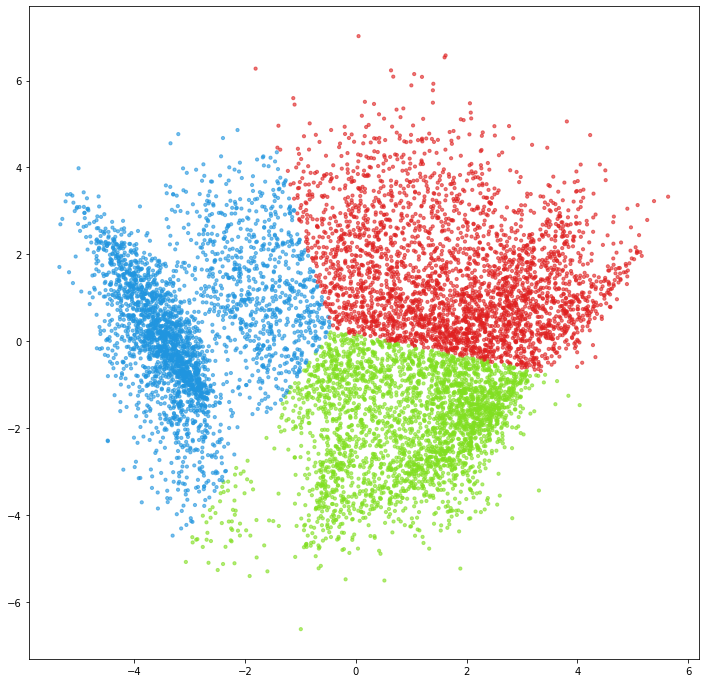

In [36]:

plt.figure(figsize = (12,12))

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
principalDf['cen_x'] = principalDf.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
principalDf['cen_y'] = principalDf.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
principalDf['c'] = principalDf.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(principalDf['PC 1'], principalDf['PC 2'], c=principalDf.c, alpha = 0.6, s=10)


In [37]:
principalDf

,PC 1,PC 2,cluster,cen_x,cen_y,c
0,-0.272789,-2.835882,1,0.596783,0.280026,#81DF20
1,-3.477503,0.914867,2,0.181299,0.437033,#2095DF
2,1.497642,1.328565,0,-1.203602,-0.304501,#DF2020
3,-1.267150,-1.284123,1,0.596783,0.280026,#81DF20
4,-1.130023,-1.301061,1,0.596783,0.280026,#81DF20
...,...,...,...,...,...,...
8945,1.749326,-2.808564,1,0.596783,0.280026,#81DF20
8946,1.272639,-2.093081,1,0.596783,0.280026,#81DF20
8947,1.047372,-3.379700,1,0.596783,0.280026,#81DF20
8948,-2.757027,-4.016442,1,0.596783,0.280026,#81DF20


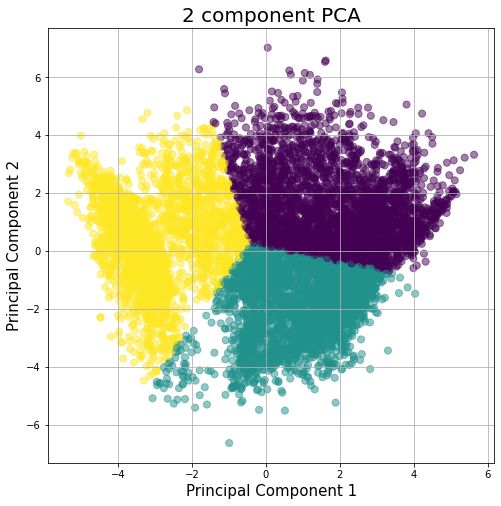

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)



ax.scatter(principalDf['PC 1'], principalDf['PC 2'], c=principalDf['cluster'] 
               , cmap='viridis'
               , s = 50, alpha = 0.5)

ax.grid()

# sns.scatterplot(x = principalDf['PC 1'], y= principalDf['PC 2'], palette=sns.color_palette('hls', model.cluster_centers_.shape[0]), s=50)
# plt.title('Cluster of Customers', size=15, pad=10)
# plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

In [57]:
# # Importing Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(df_scaled)


In [58]:
transformed = pd.DataFrame(transformed, columns = ['TC 1', 'TC 2'])

In [59]:
transformed['cluster'] = principalDf['cluster']

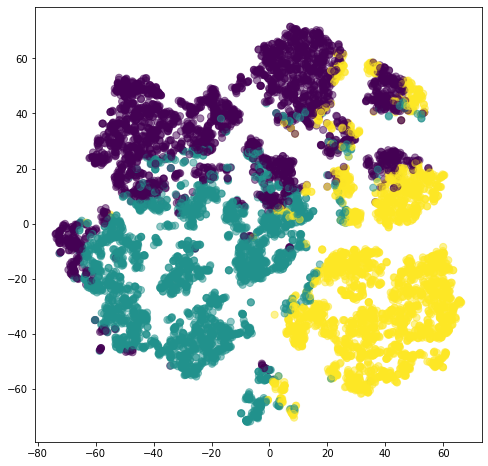

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.scatter(transformed['TC 1'], transformed['TC 2'], c=transformed['cluster'] 
               , cmap='viridis'
               , s = 50, alpha = 0.5)
plt.show()

# GMM
principalDf

In [61]:
principalDf

,PC 1,PC 2,cluster,cen_x,cen_y,c
0,-0.272789,-2.835882,1,0.596783,0.280026,#81DF20
1,-3.477503,0.914867,2,0.181299,0.437033,#2095DF
2,1.497642,1.328565,0,-1.203602,-0.304501,#DF2020
3,-1.267150,-1.284123,1,0.596783,0.280026,#81DF20
4,-1.130023,-1.301061,1,0.596783,0.280026,#81DF20
...,...,...,...,...,...,...
8945,1.749326,-2.808564,1,0.596783,0.280026,#81DF20
8946,1.272639,-2.093081,1,0.596783,0.280026,#81DF20
8947,1.047372,-3.379700,1,0.596783,0.280026,#81DF20
8948,-2.757027,-4.016442,1,0.596783,0.280026,#81DF20


In [62]:
data = principalDf[['PC 1', 'PC 2']]

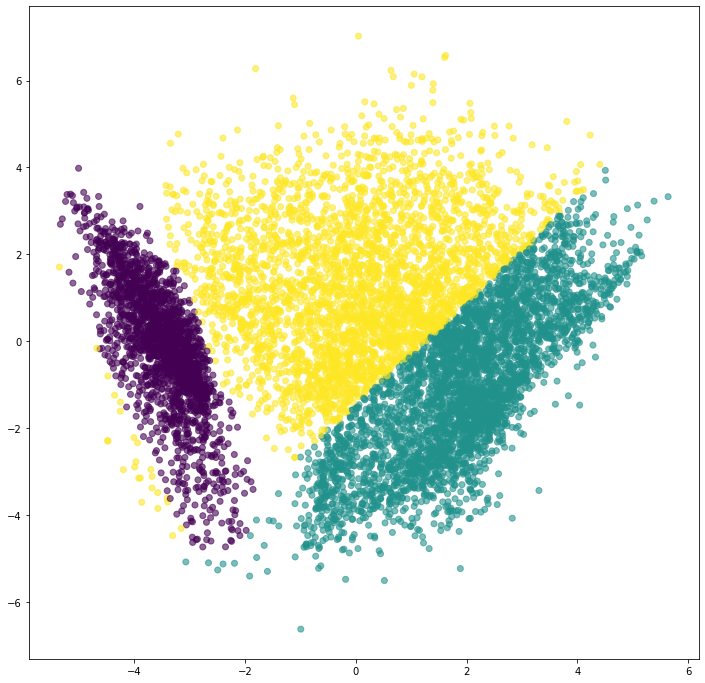

In [64]:
from sklearn.mixture import GaussianMixture 

gmm = GaussianMixture(n_components = 3) 
gmm.fit(data)

plt.figure(figsize = (12,12))
# Visualizing the clustering 
plt.scatter(principalDf['PC 1'], principalDf['PC 2'],  
           c = GaussianMixture(n_components = 3).fit_predict(data), cmap = "viridis", alpha = 0.6) 
plt.show() 


In [71]:
# Importing Modules

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Declaring Model
dbscan = DBSCAN(eps=2, min_samples=10)

# Fitting
dbscan.fit(df_scaled)

# Transoring Using PCA
pca = PCA(n_components=2).fit(df_scaled)
pca_2d = pca.transform(df_scaled)



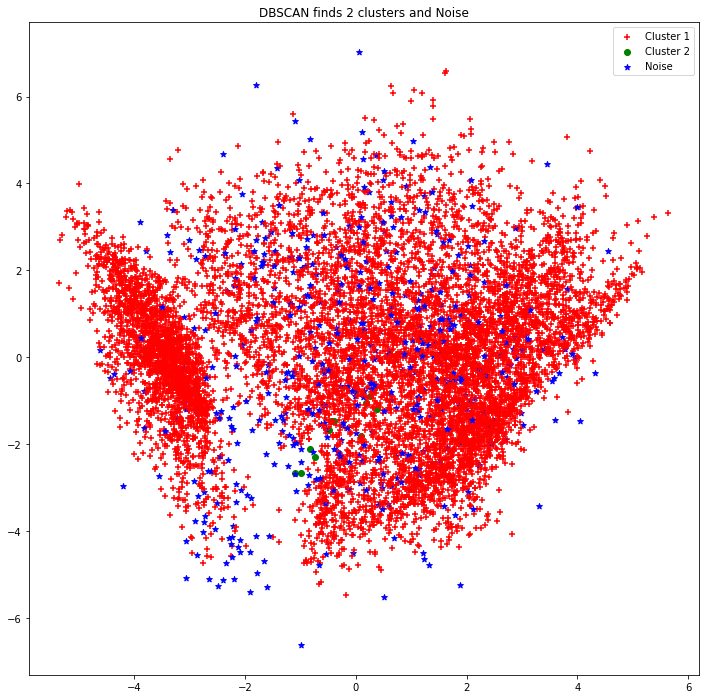

In [72]:
# Plot based on Class
plt.figure(figsize = (12,12))
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

In [66]:
df = pd.concat([df,principalDf['cluster'] ], axis = 1)

In [67]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [ ]:
# This case requires to develop a customer segmentation to define marketing strategy. The
# sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

# Following is the Data Dictionary for Credit Card dataset :-

# CUSTID : Identification of Credit Card holder (Categorical)
# BALANCE : Balance amount left in their account to make purchases (
# BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES : Amount of purchases made from account
# ONEOFFPURCHASES : Maximum purchase amount done in one-go
# INSTALLMENTSPURCHASES : Amount of purchase done in installment
# CASHADVANCE : Cash in advance given by the user
# PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
# CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
# PURCHASESTRX : Numbe of purchase transactions made
# CREDITLIMIT : Limit of Credit Card for user
# PAYMENTS : Amount of Payment done by user
# MINIMUM_PAYMENTS : Minimum amount of payments made by user
# PRCFULLPAYMENT : Percent of full payment paid by user
# TENURE : Tenure of credit card service for user

In [ ]:
temp1 = pd.DataFrame(df.groupby('cluster').agg(['sum'])['BALANCE'])
print(temp1.head())

plt.figure(figsize=(8,6)) 
ax = sns.barplot(x=temp1.index, y=temp1['sum'], data=temp1, palette="Set1")
plt.ylabel("total BALANCE")

                sum
cluster            
0         275509.64
1        7285884.66
2        1417288.96


Text(0, 0.5, 'total PURCHASES')

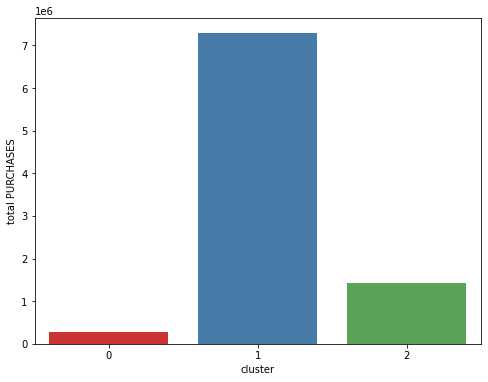

In [176]:
temp1 = pd.DataFrame(df.groupby('cluster').agg(['sum'])['PURCHASES'])
print(temp1.head())

plt.figure(figsize=(8,6)) 
ax = sns.barplot(x=temp1.index, y=temp1['sum'], data=temp1, palette="Set1")
plt.ylabel("total PURCHASES")

                  sum
cluster              
0        6.108534e+06
1        2.573456e+06
2        7.890608e+04


Text(0, 0.5, 'total CASH_ADVANCE')

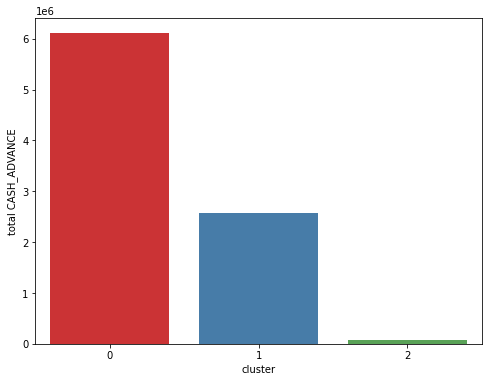

In [177]:
temp1 = pd.DataFrame(df.groupby('cluster').agg(['sum'])['CASH_ADVANCE'])
print(temp1.head())

plt.figure(figsize=(8,6)) 
ax = sns.barplot(x=temp1.index, y=temp1['sum'], data=temp1, palette="Set1")
plt.ylabel("total CASH_ADVANCE")

                  sum
cluster              
0        1.217947e+07
1        1.841254e+07
2        9.631814e+06


Text(0, 0.5, 'total CREDIT_LIMIT')

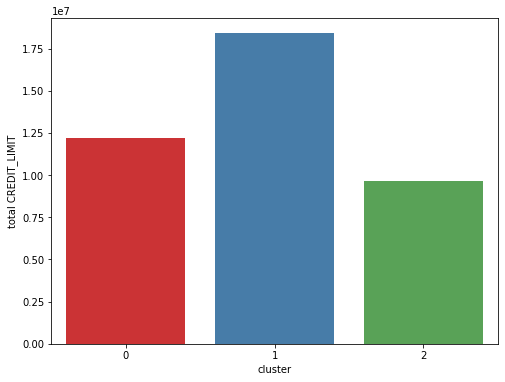

In [178]:
temp1 = pd.DataFrame(df.groupby('cluster').agg(['sum'])['CREDIT_LIMIT'])
print(temp1.head())

plt.figure(figsize=(8,6)) 
ax = sns.barplot(x=temp1.index, y=temp1['sum'], data=temp1, palette="Set1")
plt.ylabel("total CREDIT_LIMIT")

# Balance

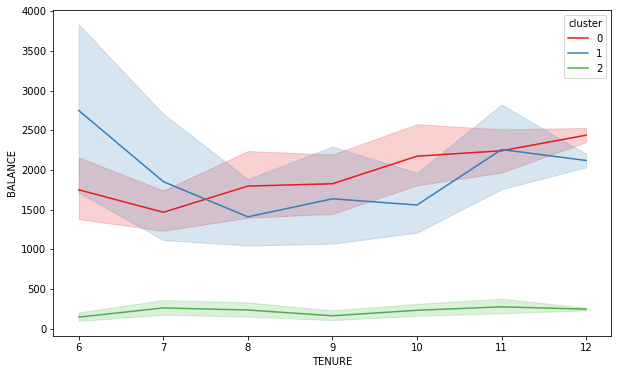

In [180]:
plt.figure(figsize=(10,6)) 
ax = sns.lineplot(x="TENURE", y="BALANCE",  hue="cluster", data=df, palette="Set1")

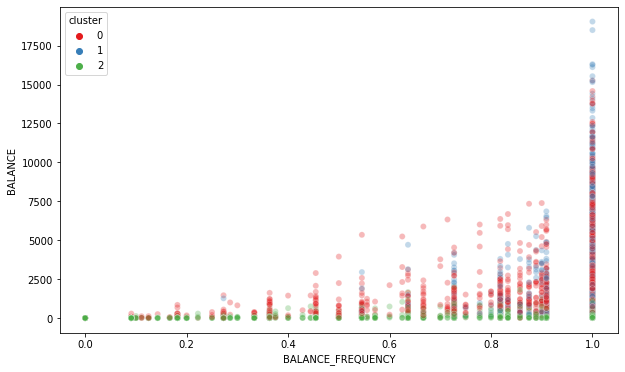

In [181]:
plt.figure(figsize=(10,6)) 
ax = sns.scatterplot(x="BALANCE_FREQUENCY", y="BALANCE",  hue="cluster", data=df, palette="Set1", alpha = .3)

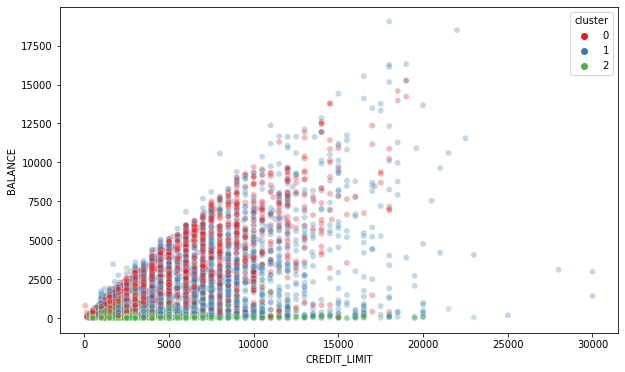

In [182]:
plt.figure(figsize=(10,6)) 
ax = sns.scatterplot(x="CREDIT_LIMIT", y="BALANCE",  hue="cluster", data=df, palette="Set1", alpha = 0.3)

# Purchases

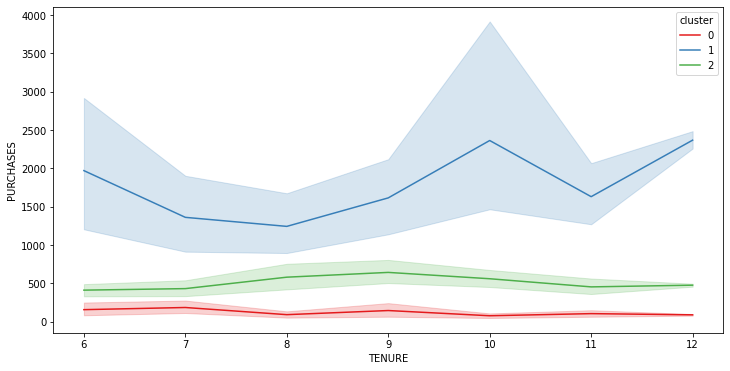

In [183]:
plt.figure(figsize=(12,6)) 
ax = sns.lineplot(x="TENURE", y="PURCHASES",  hue="cluster", data=df, palette="Set1")

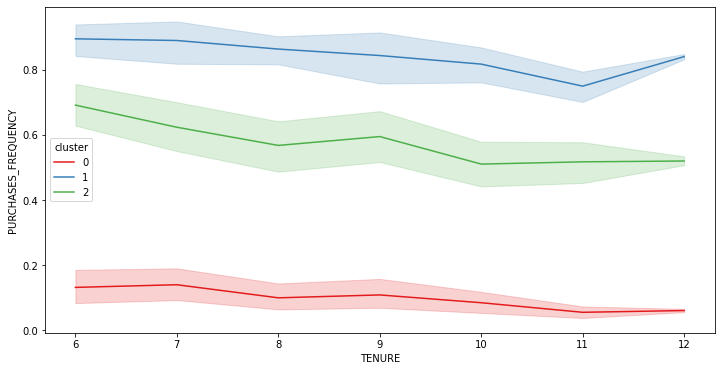

In [184]:
plt.figure(figsize=(12,6)) 
ax = sns.lineplot(x="TENURE", y="PURCHASES_FREQUENCY",  hue="cluster", data=df, palette="Set1")

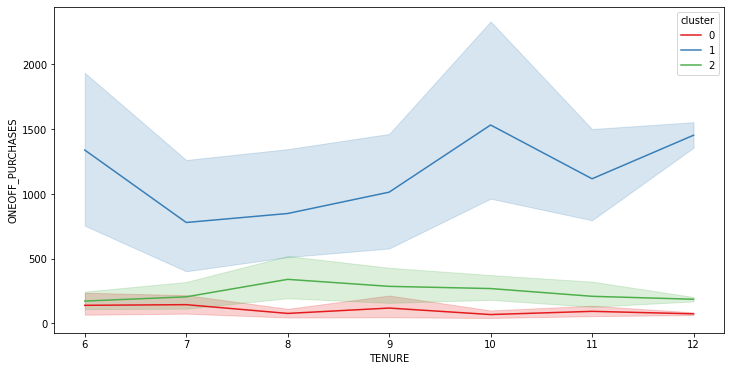

In [185]:
plt.figure(figsize=(12,6)) 
ax = sns.lineplot(x="TENURE", y="ONEOFF_PURCHASES",  hue="cluster", data=df, palette="Set1")

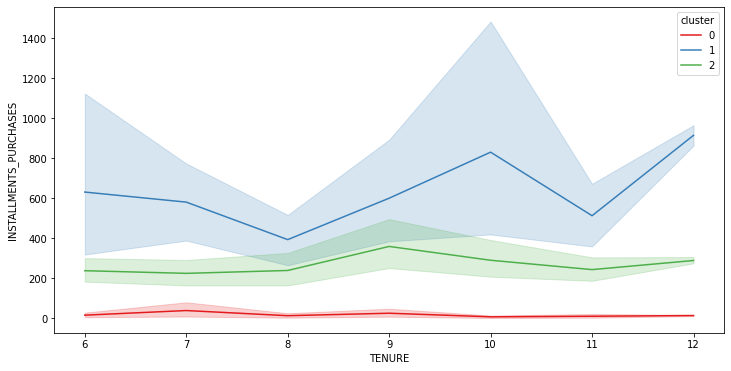

In [186]:
plt.figure(figsize=(12,6)) 
ax = sns.lineplot(x="TENURE", y="INSTALLMENTS_PURCHASES",  hue="cluster", data=df, palette="Set1")

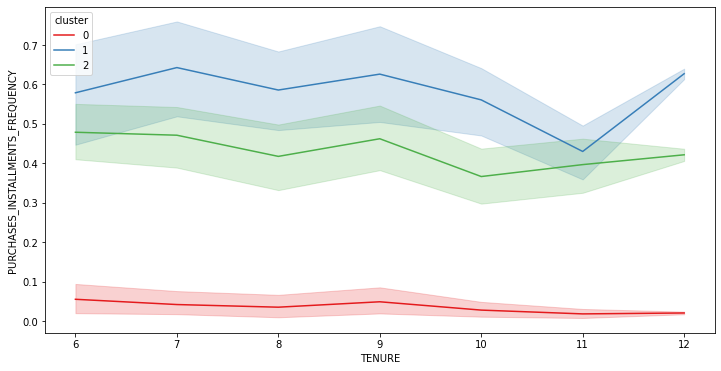

In [187]:
plt.figure(figsize=(12,6)) 
ax = sns.lineplot(x="TENURE", y="PURCHASES_INSTALLMENTS_FREQUENCY",  hue="cluster", data=df, palette="Set1")

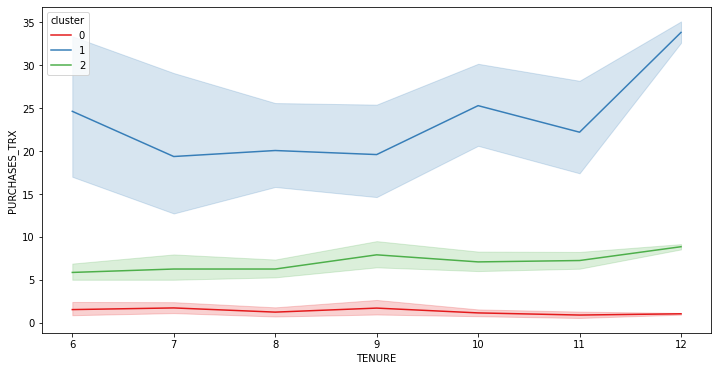

In [188]:
plt.figure(figsize=(12,6)) 
ax = sns.lineplot(x="TENURE", y="PURCHASES_TRX",  hue="cluster", data=df, palette="Set1")



# Cash Advance

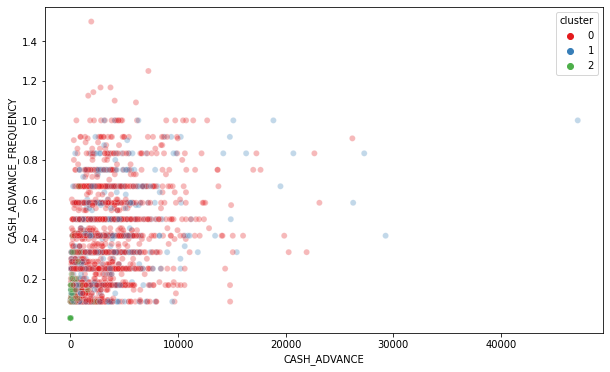

In [189]:
plt.figure(figsize=(10,6)) 
ax = sns.scatterplot(x="CASH_ADVANCE", y="CASH_ADVANCE_FREQUENCY",  hue="cluster", data=df, palette="Set1", alpha = 0.3)

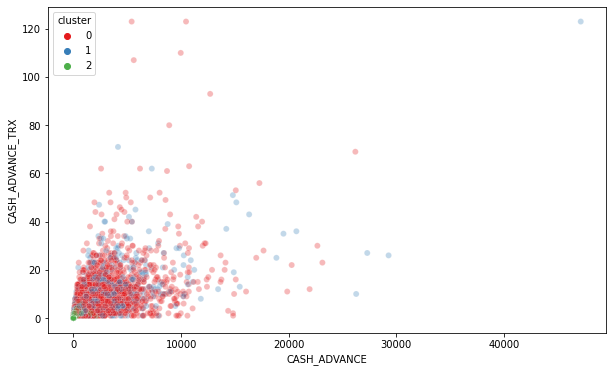

In [190]:
plt.figure(figsize=(10,6)) 
ax = sns.scatterplot(x="CASH_ADVANCE", y="CASH_ADVANCE_TRX",  hue="cluster", data=df, palette="Set1", alpha = 0.3)

# Payments

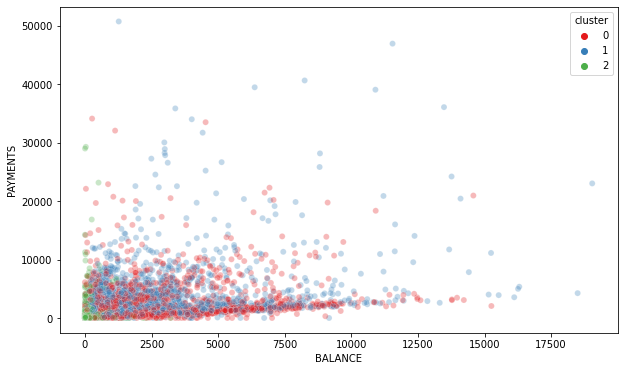

In [191]:
plt.figure(figsize=(10,6)) 
ax = sns.scatterplot(x="BALANCE", y="PAYMENTS",  hue="cluster", data=df, palette="Set1", alpha = 0.3)

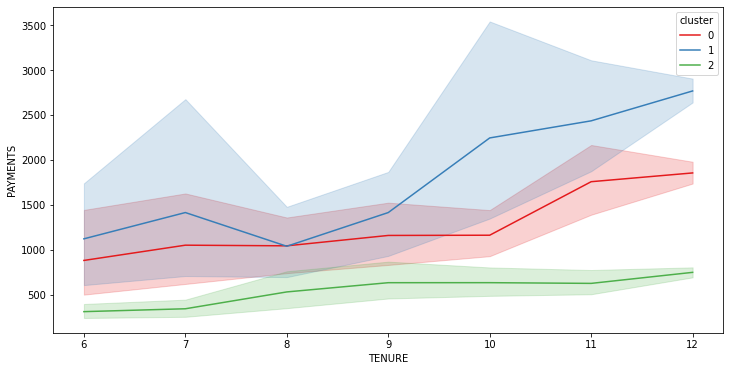

In [192]:
plt.figure(figsize=(12,6)) 
ax = sns.lineplot(x="TENURE", y="PAYMENTS",  hue="cluster", data=df, palette="Set1")